# Exercice 1

<img src = "picture/exo1.png">

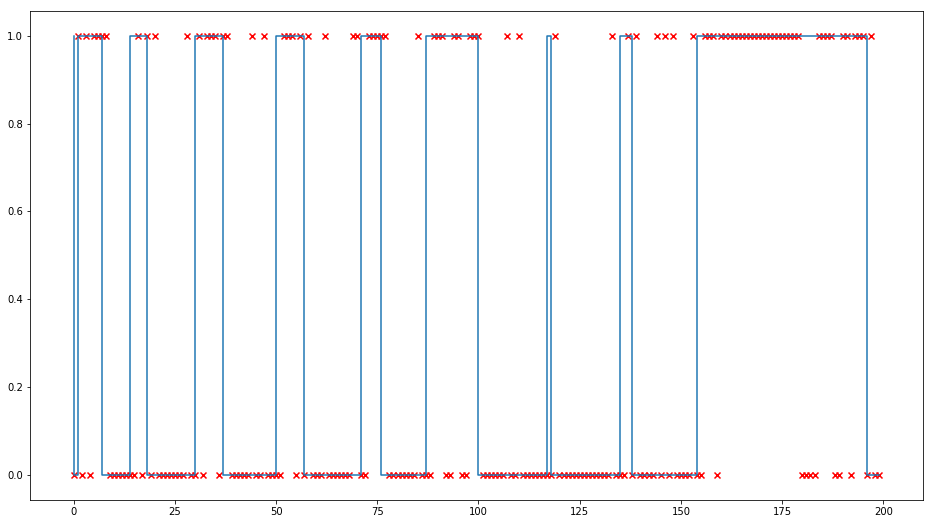

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.figure(figsize=(16,9)) 

iteration = 199
observations = []
states = []

#a is the probability for the observation to change
#b is the probability that the state is the same as the observation
a,b = 0.1, 0.8

#start with a happy state 
#because of np starting generating number with 0 happy and smile = 0 and sad and grimace = 1
initial_state = 0
observations.append(initial_state)
states.append(np.random.choice(2,1, p=[0.8, 0.2])[0])
for i in range(iteration):
    
    if states[i] == 0:
        #hidden state probability distribution based on current observation
        observations.append(np.random.choice(2,1, p=[0.8, 0.2])[0])
        #observation distribution based on current state
        states.append(np.random.choice(2,1, p=[0.9, 0.1])[0])
    if states[i] == 1:
        observations.append(np.random.choice(2,1, p=[0.2, 0.8])[0])
        states.append(np.random.choice(2,1, p=[0.1, 0.9])[0])

#plot observations as scatter and state as step
plt.step(np.arange(len(states)), states)
plt.scatter(np.arange(len(observations)), observations, c = 'red', marker= 'x')

# Exercice 2 : Viterbi implementation

<img src="picture/exo2.png">

In [3]:
#since there is no built-in Viterbi function in Python, I coded my own version of the algorithmn
def viterbi(observations, p_state, p_observation):
    #state probabilities
    p_same_state = 1 - p_state
    p_different_state = p_state
    #observation probabilities
    p_same_state_observation = p_observation
    p_different_state_observation = 1 - p_observation
    #array of probabilities
    probabilities = []
    #get first state probability based on first observation
    if observations[0] == 0:
        probabilities.append((p_same_state_observation,p_different_state_observation))
    else:
        probabilities.append((p_different_state_observation,p_same_state_observation))
    #loop throught observations
    for i in range(1,len(observations)):
        #get last probability for the 2 possible states
        yesterday_happy, yesterday_sad = probabilities[-1]
        #when current observation is smile
        if observations[i] == 0:
            #get probability for today happy when yesterday was happy OR yesterday was sad
            today_happy = max(yesterday_happy*p_same_state*p_same_state_observation, 
                              yesterday_sad*p_different_state*p_same_state_observation)
            #get probability for today sad when yesterday was happy OR yesterday was sad
            today_sad = max(yesterday_happy*p_different_state_observation*p_different_state,
                            yesterday_sad*p_different_state_observation*p_same_state)
        #when current observation is grimace
        else:
            #get probability for today happy when yesterday was happy OR yesterday was sad
            today_happy = max(yesterday_happy*p_same_state*p_different_state_observation,
                             yesterday_sad*p_different_state*p_different_state_observation)
            #get probability for today sad when yesterday was happy OR yesterday was sad
            today_sad = max(yesterday_happy*p_different_state*p_same_state_observation,
                           yesterday_sad*p_same_state*p_same_state_observation)
        #add the 2 probabilities to array
        probabilities.append((today_happy, today_sad))
    #array of most probable states based on viterbi algorithmn 
    results = []
    #loop throught calculed probabilities
    for p in probabilities:
        #when proba of state happy is greater then proba of state sad
        if p[0] > p[1]:
            #add happy state to results array
            results.append(0)
        #when proba of state sad is greater then proba of state happy
        else:
            #add sad state to results array
            results.append(1)
    return results

## Exercice 2 : Visualisation and accuracy 

<img src="picture/exo3.png">

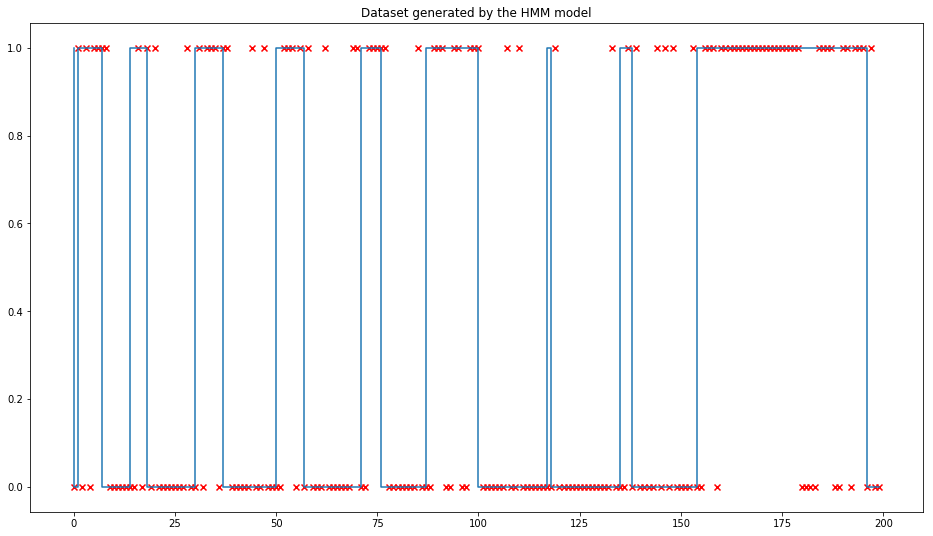

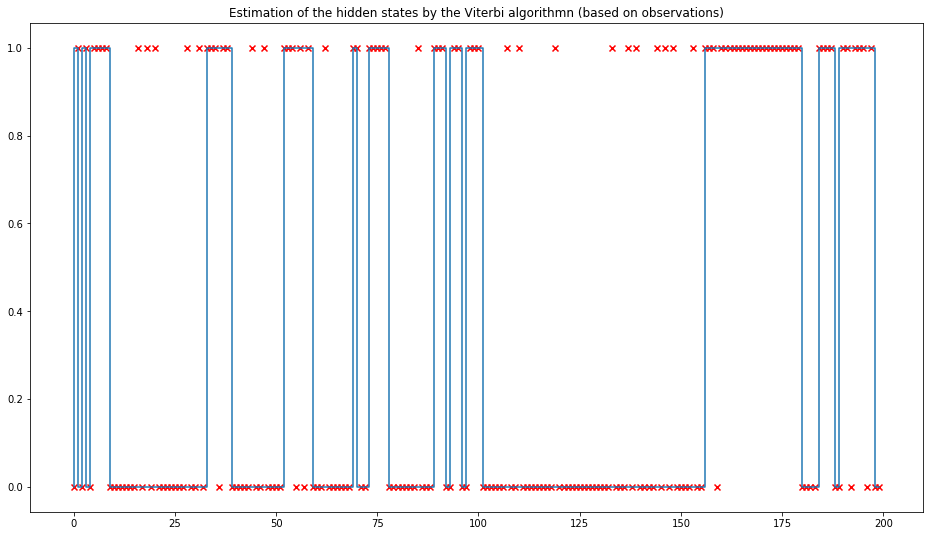

Nb of error : 42 out of 200
Accuracy : 79.0 %


In [11]:
#call the Viterbi algorithmn and store hidden state estimates
viterbi_states = viterbi(observations, a, b)
#plot the original hidden state with observations
plt.figure(figsize=(16,9))
plt.step(np.arange(len(states)), states)
plt.scatter(np.arange(len(observations)), observations, c = 'red', marker= 'x')
plt.title('Dataset generated by the HMM model')
plt.show()
#plot the Viterbi states estimate
plt.figure(figsize=(16,9))
plt.step(np.arange(len(viterbi_states)), viterbi_states)
plt.scatter(np.arange(len(observations)), observations, c = 'red', marker= 'x')
plt.title('Estimation of the hidden states by the Viterbi algorithmn (based on observations)')
plt.show()
#error calculation
nb_errors = 0
for i in range(len(observations)):
    #whenever a state is not the same as a estimate state
    if viterbi_states[i] != states[i]:
        #we add 1 to the total numbers of errors
        nb_errors = nb_errors + 1
print ("Numbers of errors : "+ str(nb_errors) + " out of " + str(len(observations)))
#we then calculate the mean between the error and the total number of states
print("Accuracy : " + str((len(observations) - nb_errors)/len(observations) * 100) + " %")

# Exercice 3 : Bayesian Filtering

<img src = "picture/exo4.png">